In [1]:
import librosa as lr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [3]:
df = pd.read_csv("data/trainsetwhitenoise_sr22050.csv")

In [8]:
def train_test(X, y, percent=None):
    length = len(y)
    mid = int(length / 2)
    return X[:mid], X[mid:], y[:mid], y[mid:]
    


In [9]:
X_train, X_test, y_train, y_test = train_test(df["pre_filter"].to_numpy(), df["post_filter"].to_numpy())

In [10]:
xgb_model = xgb.XGBRegressor()

In [11]:
# xgb_model.fit(X_train.reshape(-1,1), y_train)

In [12]:
# y_pred = xgb_model.predict(X_test.reshape(-1,1))

In [13]:
# x_axis = [i for i in range(len(y_pred))]

In [14]:
# start = 44100
# stop = start+200

In [15]:
# while start < (len(y_pred) - 400):
#     plt.plot(x_axis[start:stop], y_test[start:stop], label="Y test")
#     plt.plot(x_axis[start:stop], y_pred[start:stop], label="Y predict")
#     plt.legend()
#     plt.show()
#     start = start + 44100
#     stop = start+200

In [16]:
import soundfile as sf

In [17]:
# sf.write("y_pred.wav", y_pred, 44100, subtype="PCM_24")
# sf.write("y_test.wav", y_test, 44100, subtype="PCM_24")


In [18]:
window = 9
half_window = int(window / 2)
X_train_ann = np.zeros((X_train.shape[0] - (window-1), window))
y_train_ann = y_train[half_window:-half_window].copy()

for idx, item in enumerate(X_train[half_window:-half_window]):
    X_train_ann[idx] = [X_train[idx+(i-half_window)] for i in range(window)]

X_test_ann = np.zeros((X_test.shape[0] - (window-1), window))
y_test_ann = y_test[half_window:-half_window]

for idx, item in enumerate(X_test[half_window:-half_window]):
    X_test_ann[idx] = [X_test[idx+(i-half_window)] for i in range(window)]


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [21]:
k_model = Sequential()

In [22]:
k_model.add(Dense(16, input_shape=(window,), activation="relu"))
k_model.add(SimpleRNN(64, activation="relu"))
k_model.add(SimpleRNN(128, activation="relu"))
k_model.add(Dense(64, activation="relu"))
k_model.add(Dense(32, activation="relu"))
k_model.add(Dense(1))

ValueError: Input 0 of layer "simple_rnn" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 64)

In [25]:
k_model.compile(loss="mean_squared_error", optimizer="adam")

In [26]:
k_model.fit(X_train_ann, y_train_ann, batch_size=64, epochs=5)

Epoch 1/5


2022-12-21 17:08:37.438747: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


45478/45478 [==============================] - 34s 750us/step - loss: 0.0235
Epoch 2/5
45478/45478 [==============================] - 34s 754us/step - loss: 0.0222
Epoch 3/5
45478/45478 [==============================] - 36s 790us/step - loss: 0.0213
Epoch 4/5
45478/45478 [==============================] - 34s 758us/step - loss: 0.0205
Epoch 5/5
45478/45478 [==============================] - 34s 757us/step - loss: 0.0198


In [27]:
y_test_ann = y_test[half_window:-half_window]

In [28]:
y_pred_ann = k_model.predict(X_test_ann)

90956/90956 [==============================] - 27s 297us/step


In [29]:
start = 44100
stop = start+200
x_axis = [i for i in range(len(y_pred_ann))]

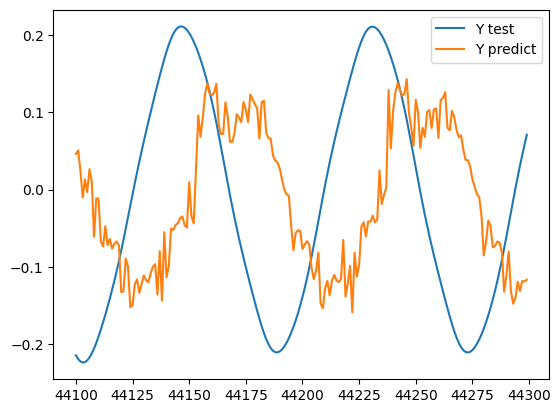

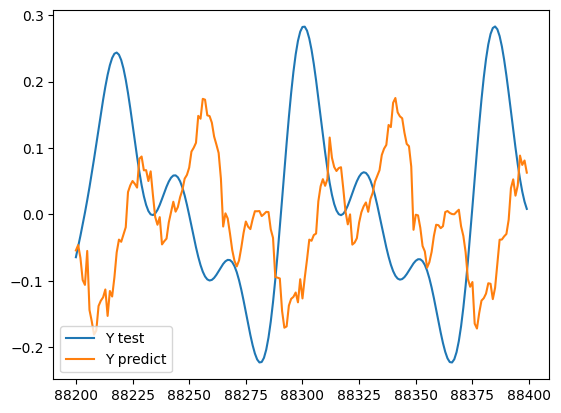

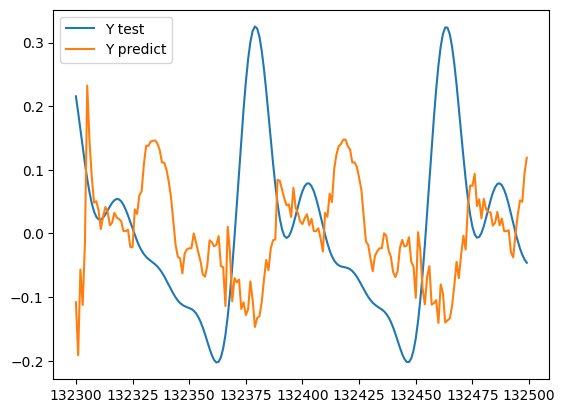

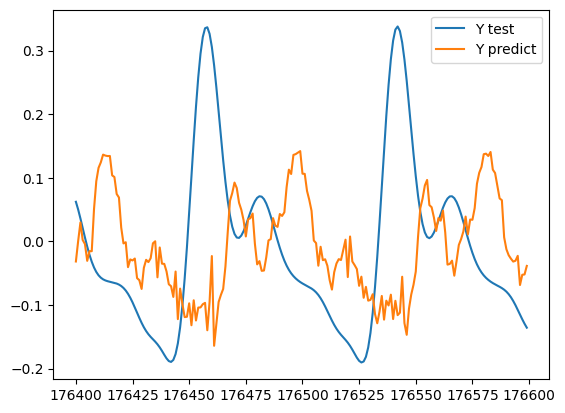

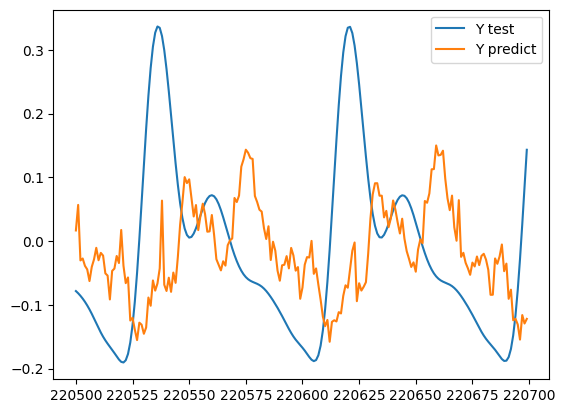

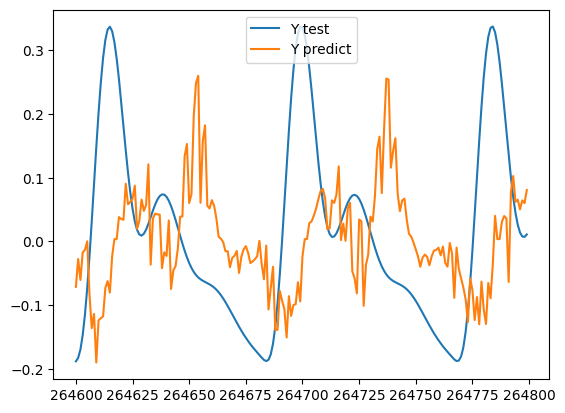

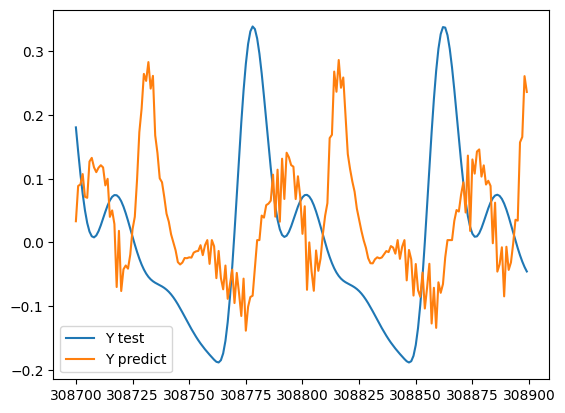

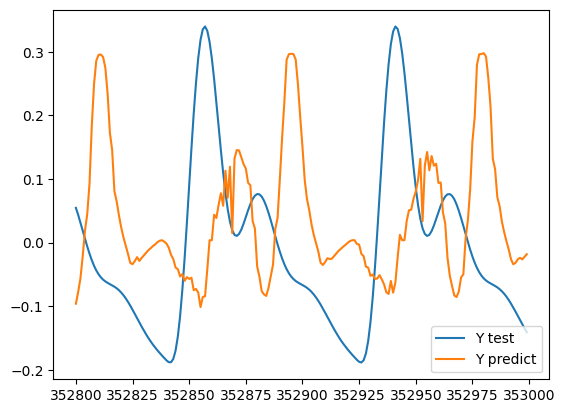

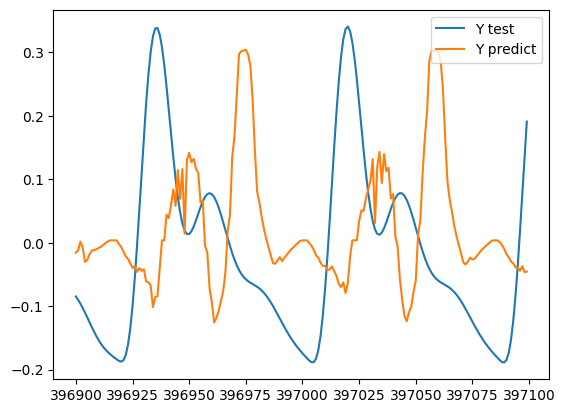

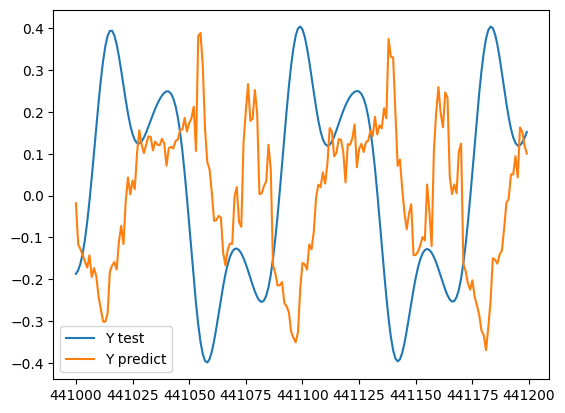

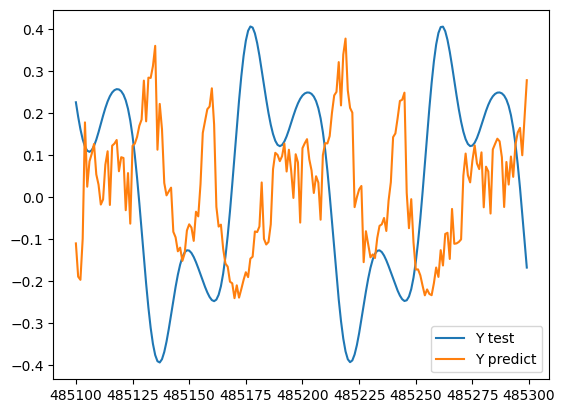

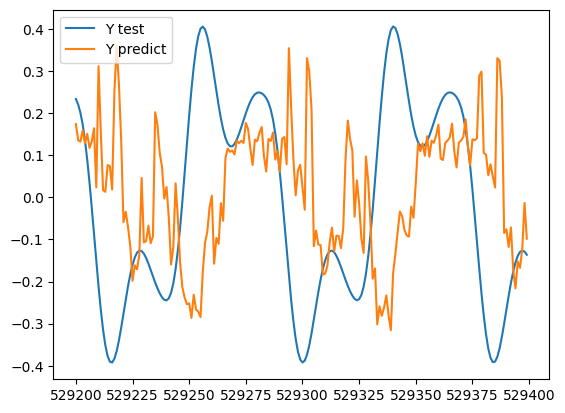

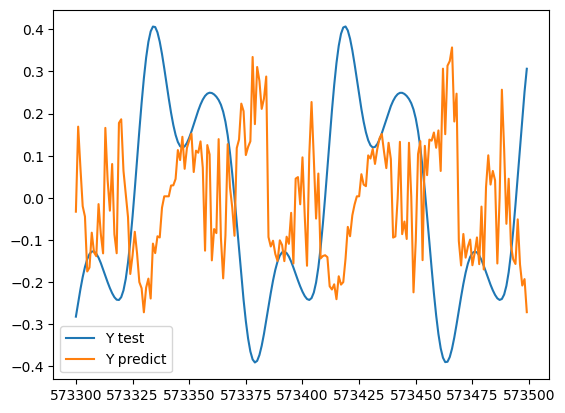

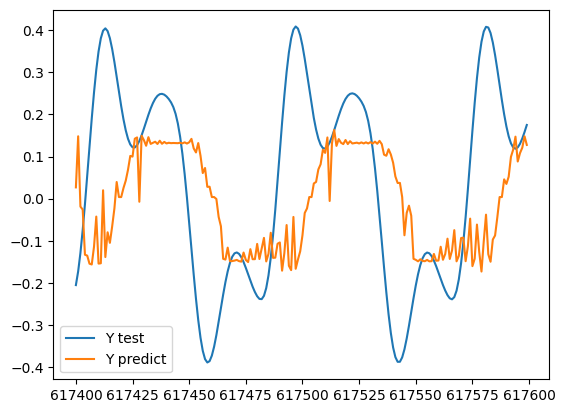

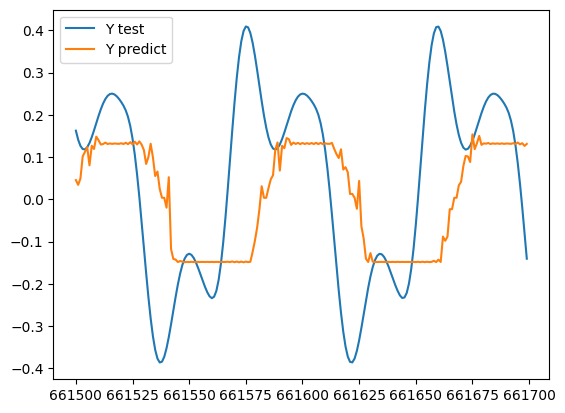

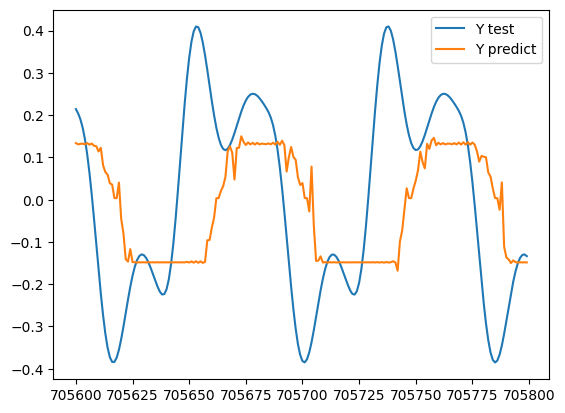

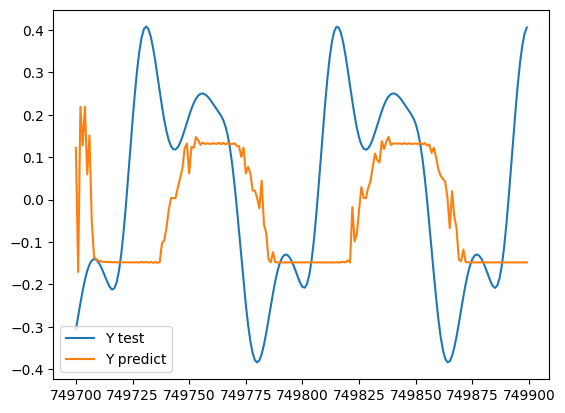

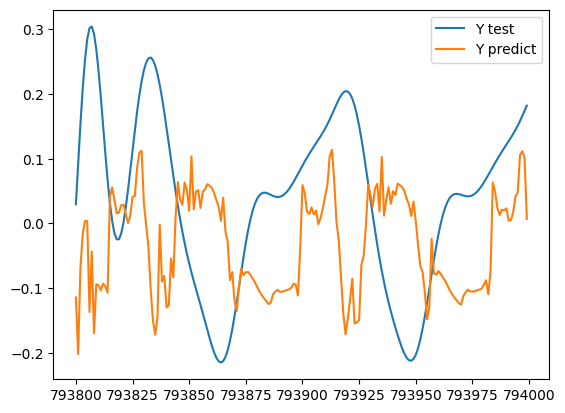

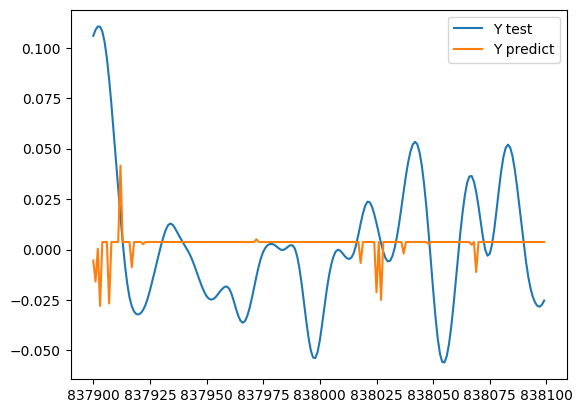

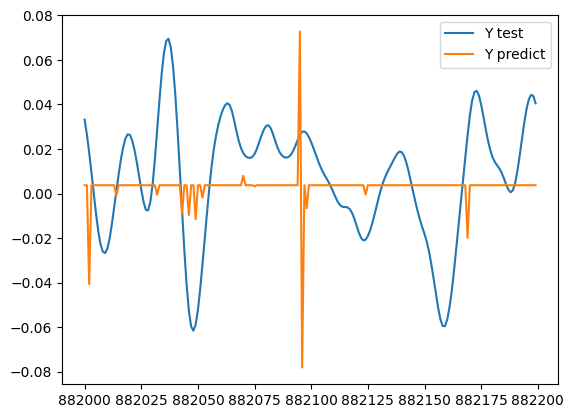

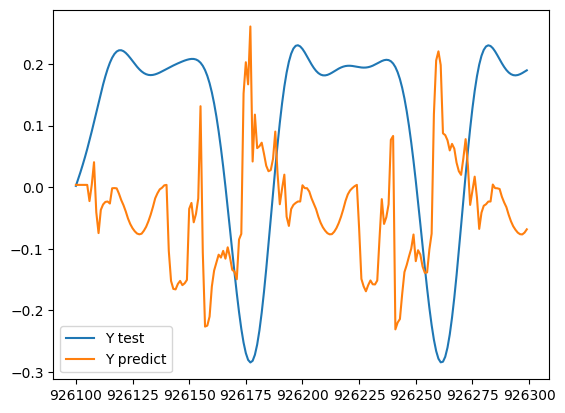

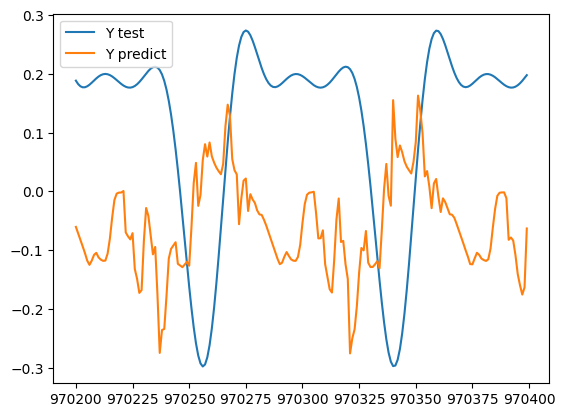

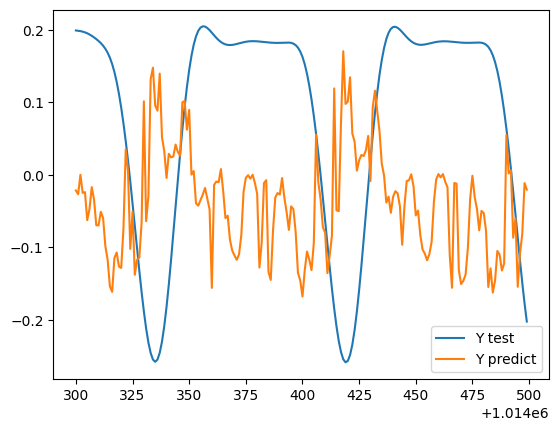

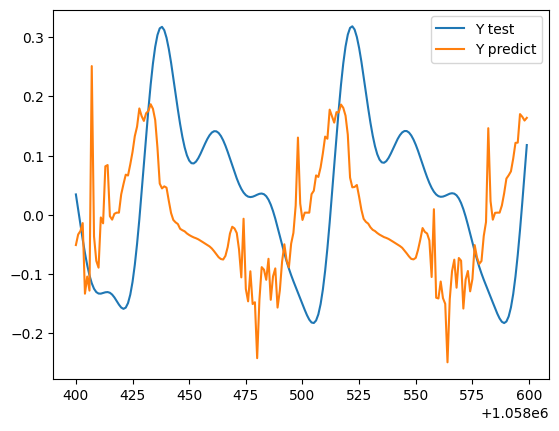

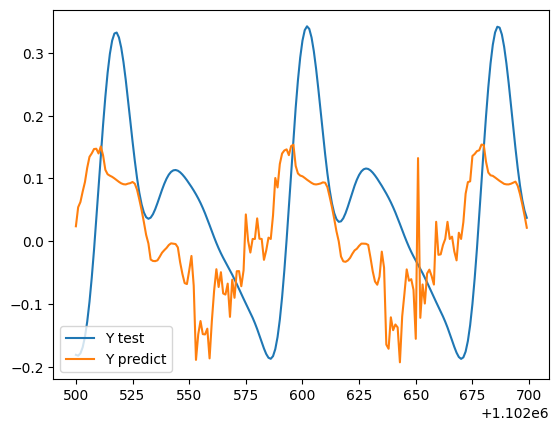

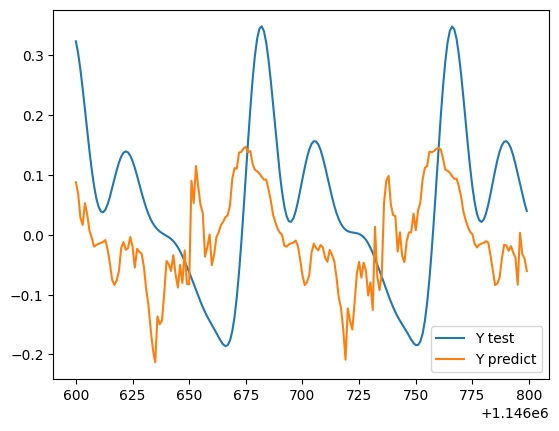

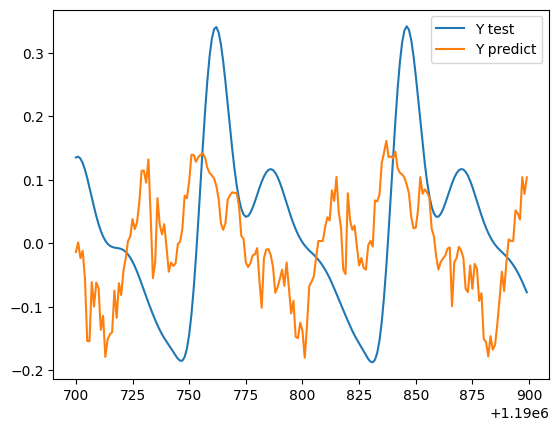

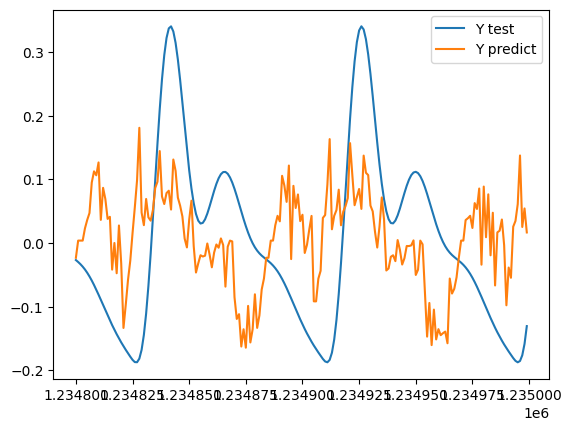

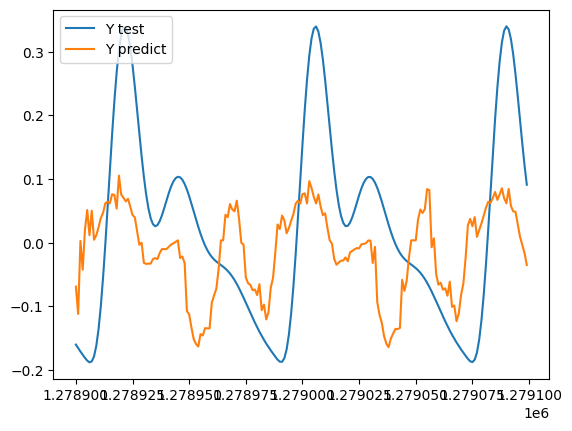

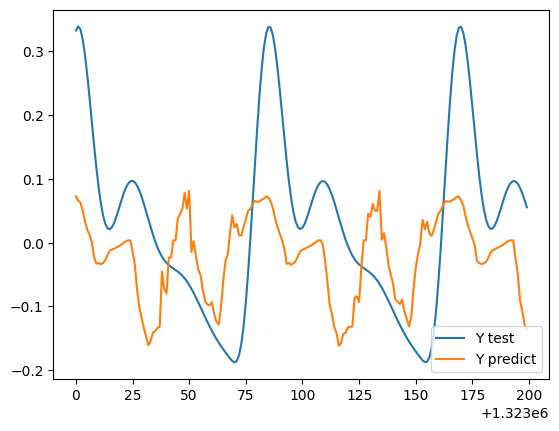

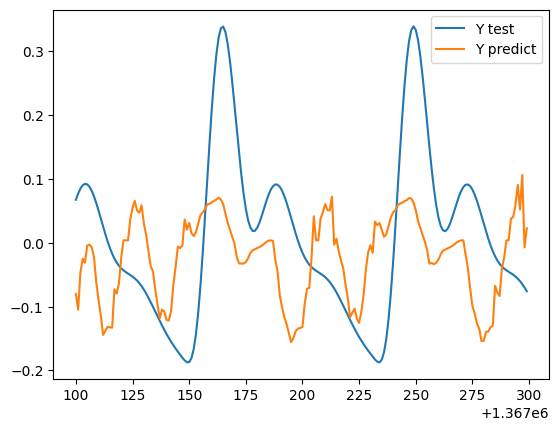

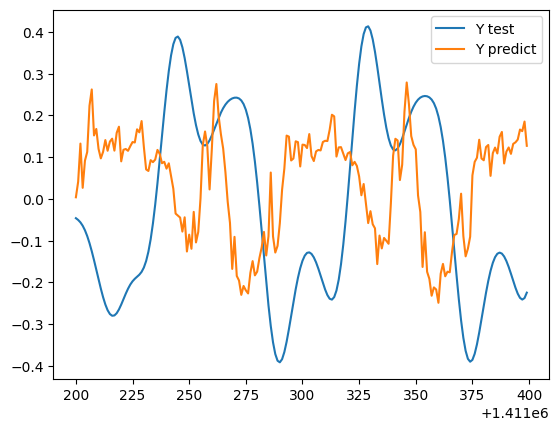

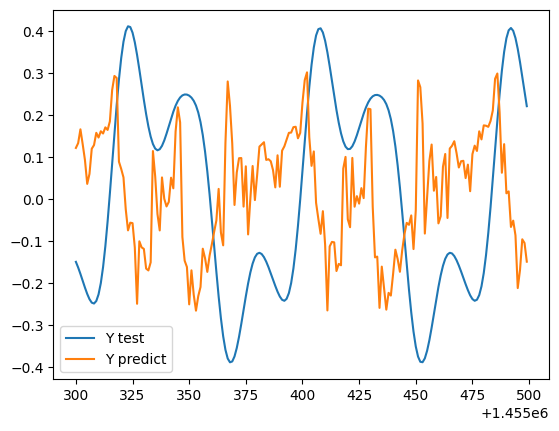

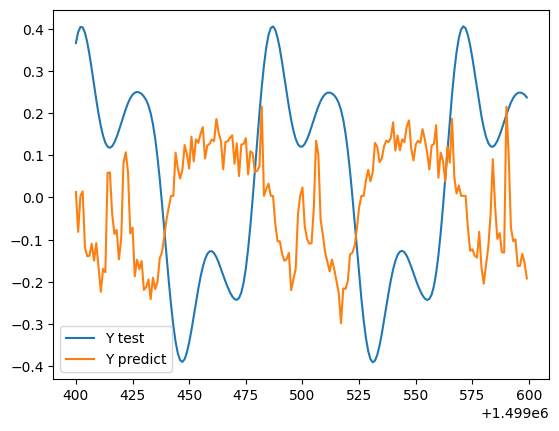

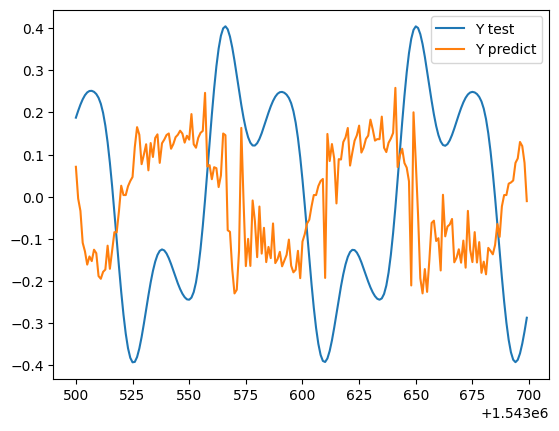

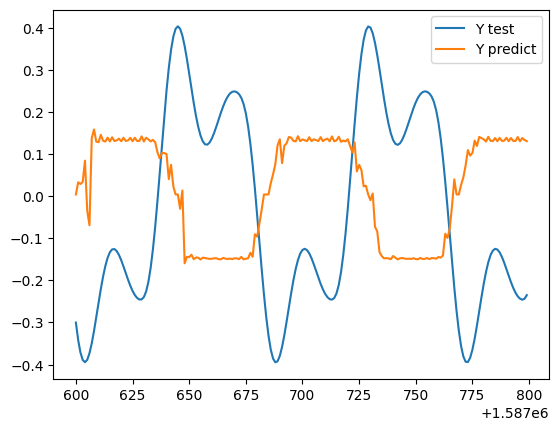

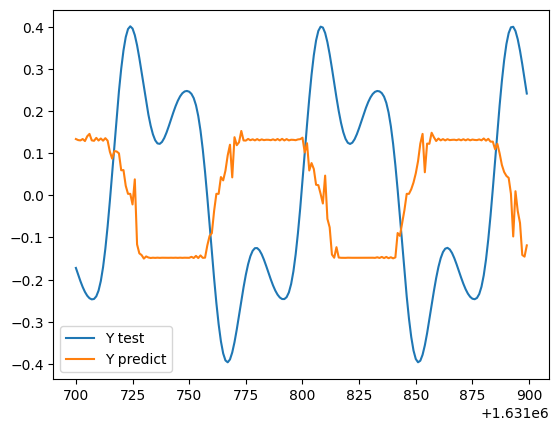

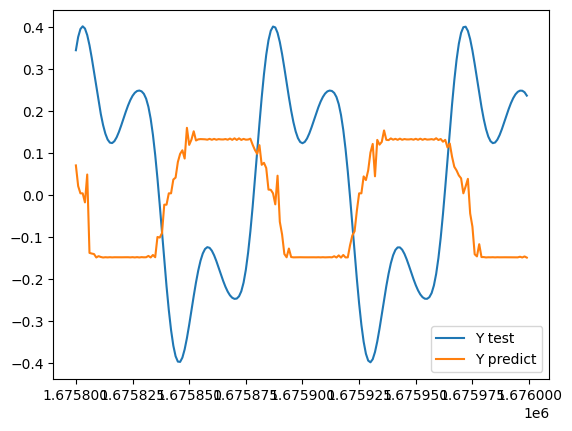

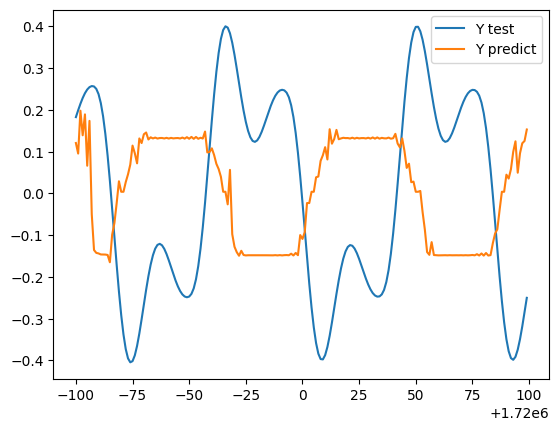

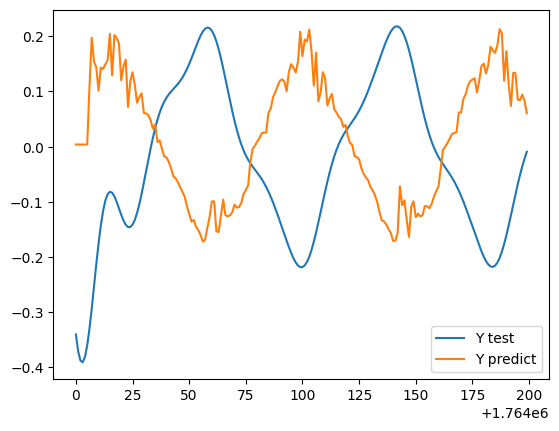

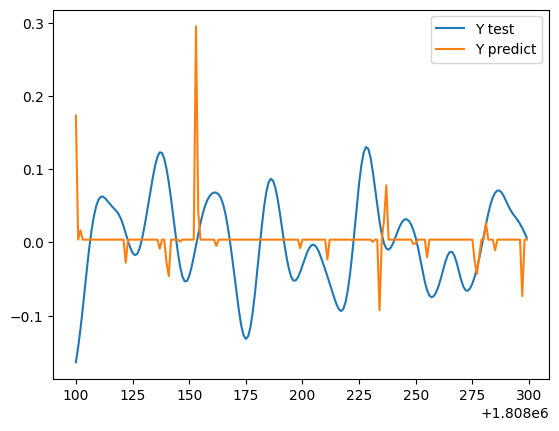

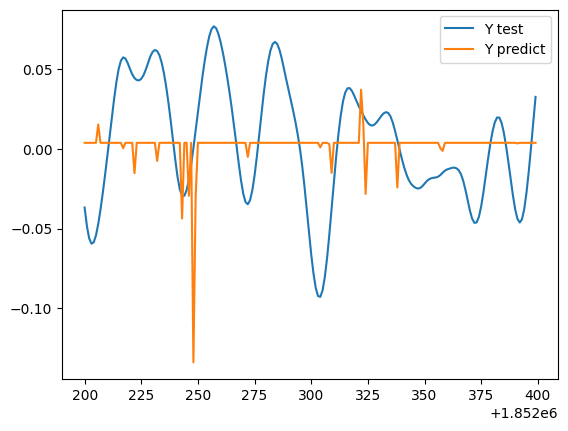

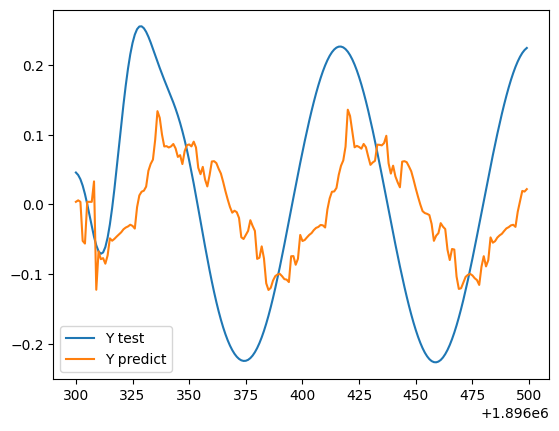

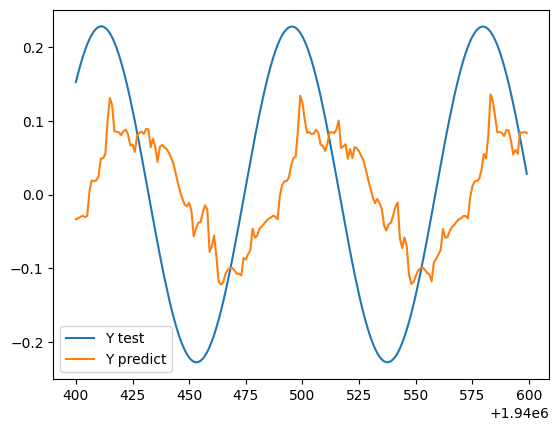

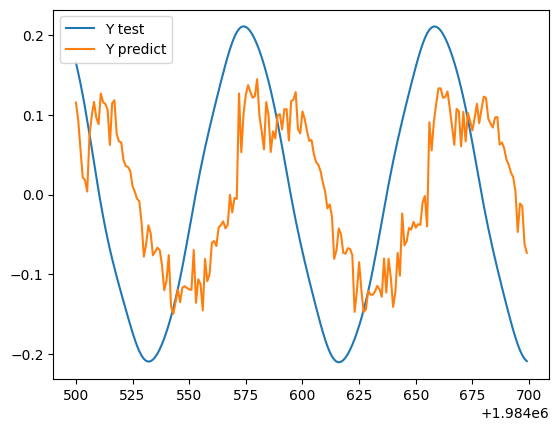

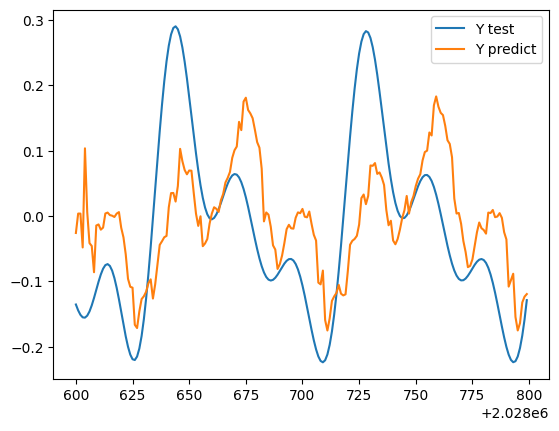

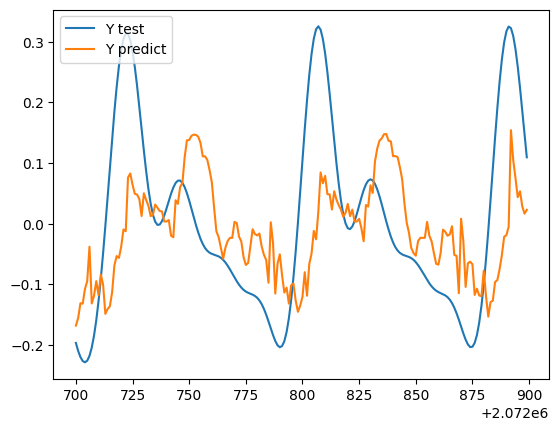

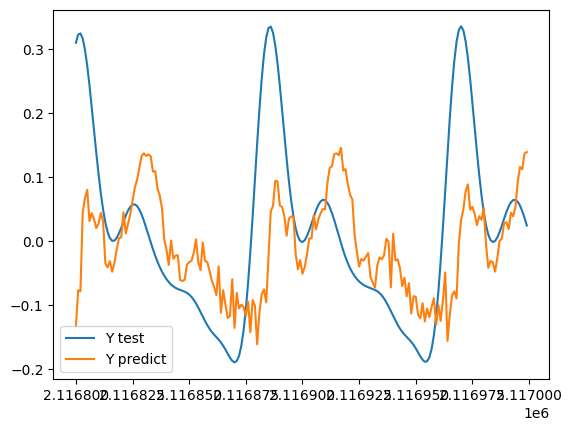

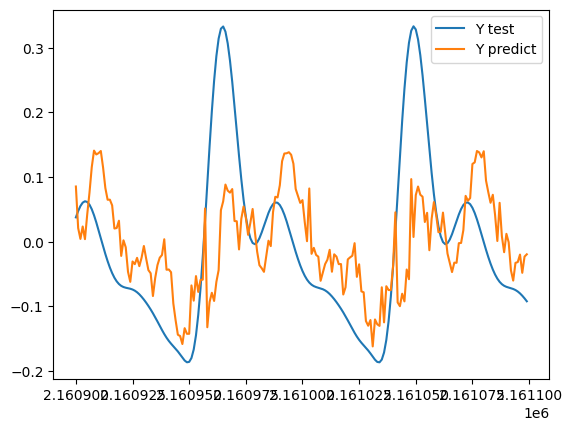

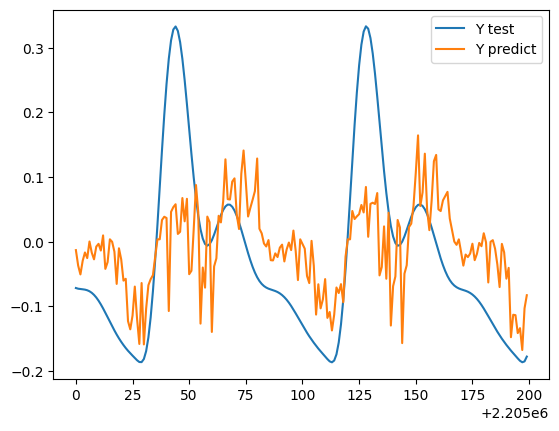

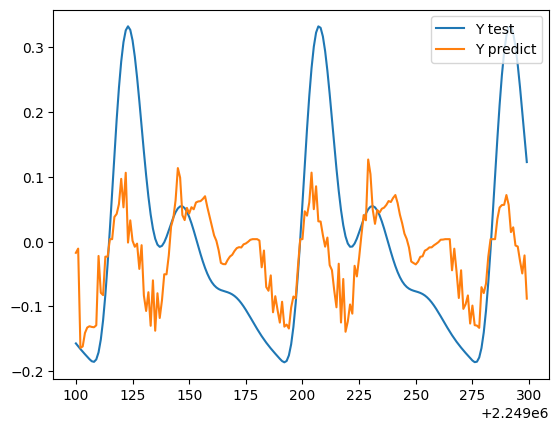

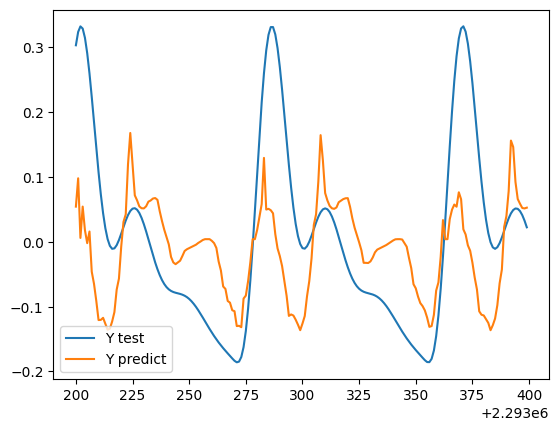

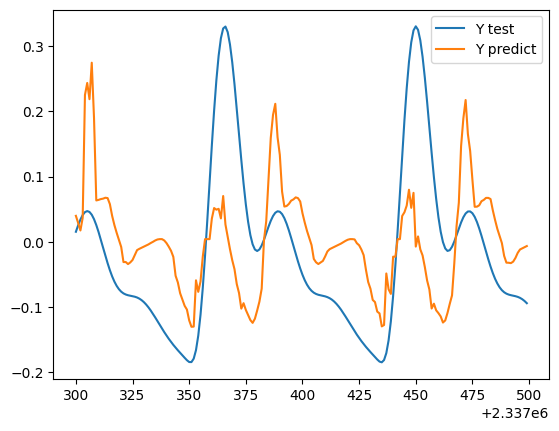

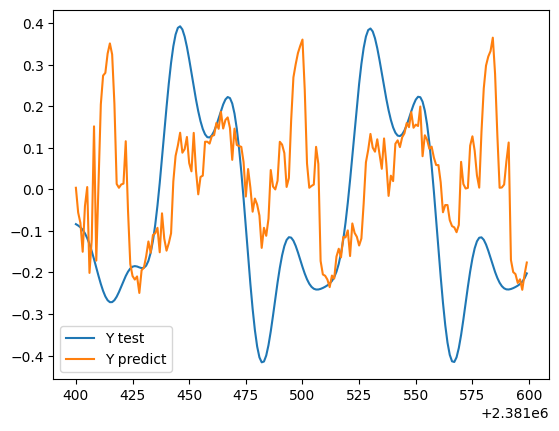

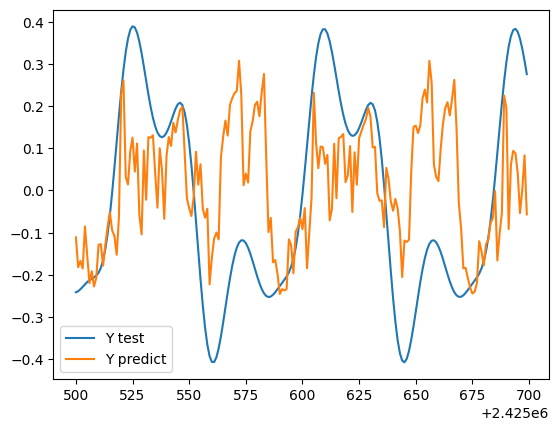

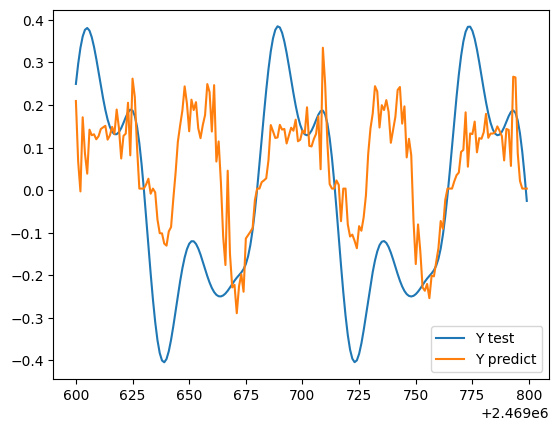

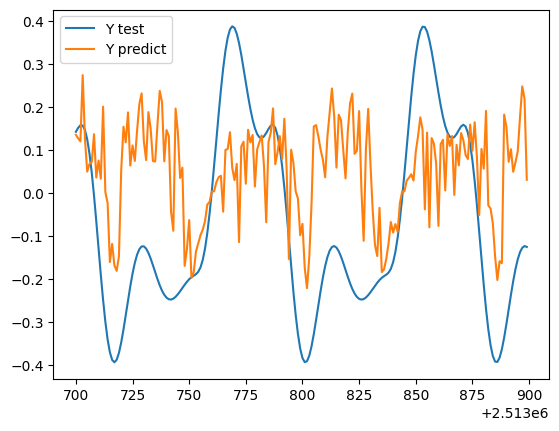

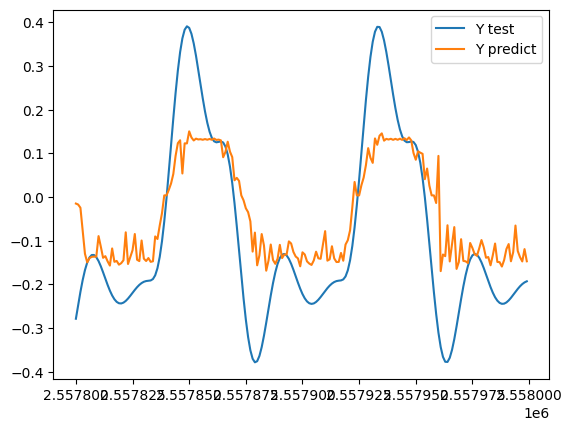

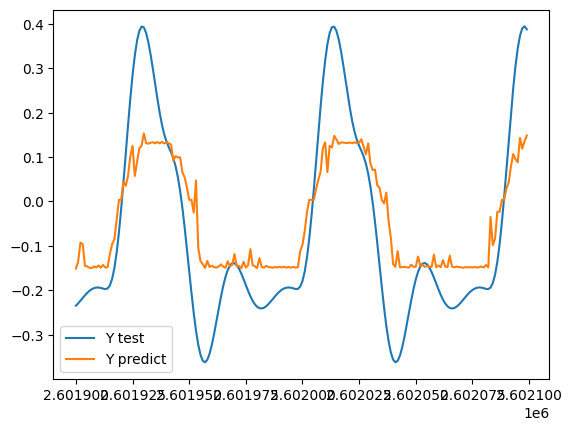

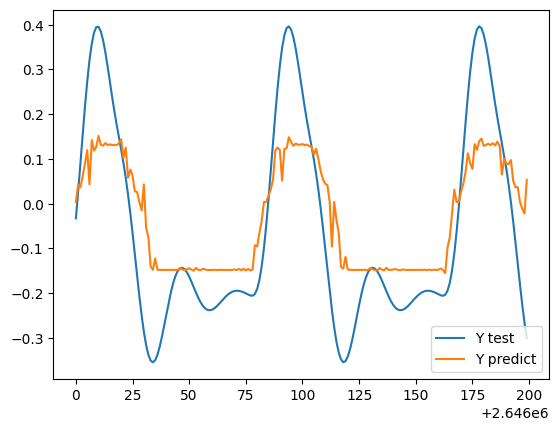

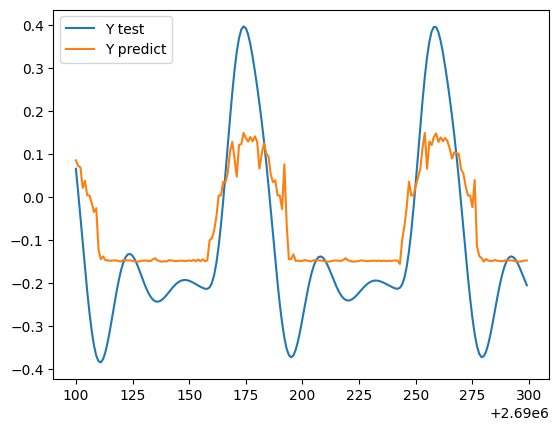

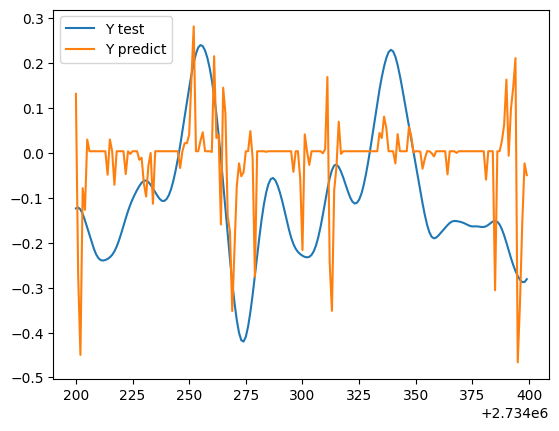

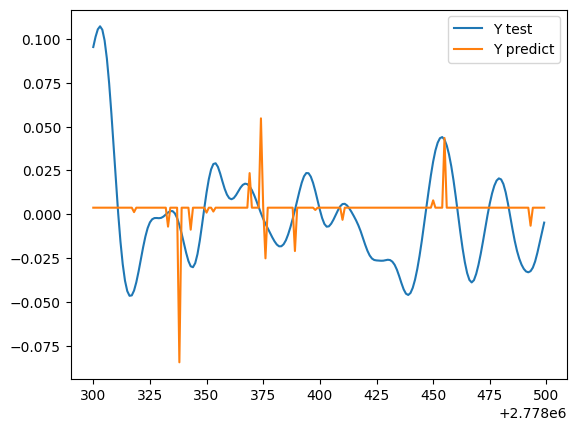

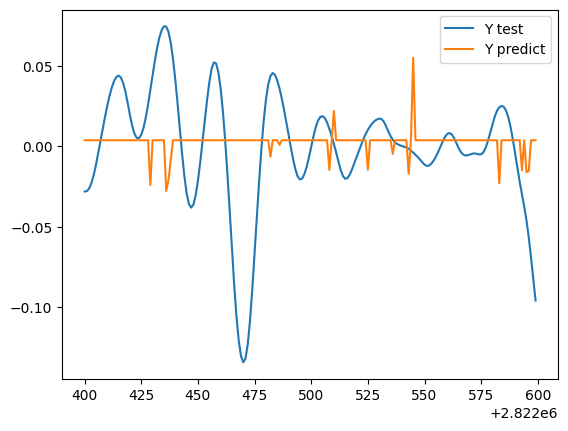

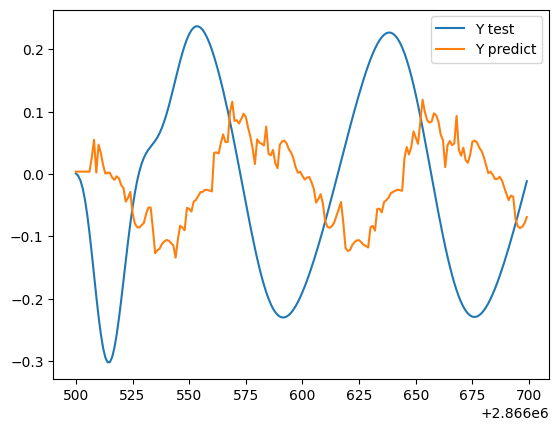

In [30]:
while start < (len(y_pred_ann) - 400):
    plt.plot(x_axis[start:stop], y_test_ann[start:stop], label="Y test")
    plt.plot(x_axis[start:stop], y_pred_ann[start:stop], label="Y predict")
    plt.legend()
    plt.show()
    start = start + 44100
    stop = start+200

In [31]:
sf.write("y_pred_ann_3.wav", y_pred_ann, 44100, subtype="PCM_24")
sf.write("y_test_ann_3.wav", y_test_ann, 44100, subtype="PCM_24")